# Capstone 2: Modeling (Match Winner Predictor)

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve

## Individual Player Modeling

### Reading in the Individual Player Files

In [2]:
X_train = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/X_train_ind.csv')
X_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [3]:
X_train.head()

,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,kills_ct,...,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam
0,-1.388730,-0.873434,0.062903,-1.555218,-0.900975,-2.008421,-1.258302,-0.353612,-0.003805,-0.499369,...,0,0,0,0,0,0,0,0,0,0
1,0.521517,-0.873434,0.893582,-0.264349,-0.900975,-0.871018,-0.143129,-0.401609,0.815253,0.365351,...,0,0,0,0,0,1,0,0,0,0
2,0.043956,0.355714,-2.013794,-0.006175,0.878442,2.063154,1.390235,1.422246,1.634310,1.230072,...,0,0,0,0,0,1,0,0,0,0
3,-0.592793,-0.463718,0.270573,0.251999,-0.011266,-1.225426,-0.700715,0.158347,-2.460978,-0.499369,...,0,0,0,0,0,0,0,0,0,0
4,-0.911168,0.355714,0.478242,-1.555218,-0.011266,-0.846292,-1.118905,-0.977563,-0.413334,-0.715549,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/y_train_ind.csv')
y_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
y_train.head()

,match_outcome
0,Loss
1,Win
2,Win
3,Loss
4,Loss


In [6]:
X_test = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/X_test_ind.csv')
X_test.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [7]:
X_test.head()

,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,kills_ct,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Cambodia,Iceland,Montenegro,Venezuela
0,0.203143,-0.054002,-0.560106,-0.522523,-0.011266,1.255433,0.553855,-0.433606,-0.003805,-0.067009,...,0,0,0,0,0,0,0,0,0,0
1,0.362330,-0.054002,0.270573,1.801042,-0.900975,0.999929,0.135665,-0.044304,-0.003805,0.797712,...,0,0,1,0,0,0,0,0,0,0
2,-0.115232,2.404294,0.478242,1.026521,2.657860,-0.030328,-0.421922,-0.145629,0.405724,-0.067009,...,0,0,1,0,0,0,0,0,0,0
3,-0.911168,-0.054002,-0.352437,-0.264349,-0.011266,0.373533,-0.561319,-0.337614,-0.003805,-1.364090,...,0,1,0,0,0,0,0,0,0,0
4,1.158266,1.994578,2.139600,0.768347,1.768151,-0.302316,-0.421922,0.510319,-0.413334,0.581532,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_test = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/y_test_ind.csv')
y_test.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [9]:
y_test.head()

,match_outcome
0,Win
1,Win
2,Win
3,Win
4,Loss


### Training Models

#### Logistic Regression

The first model we will fit with our training data is a logistic regression model (max entropy). Since we have a binary label, this model makes sense as a starting point for this notebook. Since we don't care more or less about false negatives then we do false postives, our evaluation metric will be the F1-score of our models.

In [10]:
# Make a custom scorer that allows label names rather than 0/1.
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="Win")

In [11]:
# Fit a logistic regression model with our training data.
LR = LogisticRegression()
param_grid = {'C':[0.1, 1.0, 10.0], 'penalty':['l1', 'l2'], 'solver':['liblinear']} # solvers don't work well in grid/random search
LR_cv = RandomizedSearchCV(LR, param_grid, cv=5, scoring=f1_scorer, random_state=42)
LR_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42,
                   scoring=make_scorer(f1_score, pos_label=Win))

In [12]:
# Print results.
print('Hyperparameter settings that resulted in max F1-score for training set: {}'.format(LR_cv.best_params_))
print('Max F1-score for training set: {}'.format(LR_cv.best_score_))

Hyperparameter settings that resulted in max F1-score for training set: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Max F1-score for training set: 0.8174239220337995


In [13]:
# Predict label values on our test data.
y_pred = LR_cv.best_estimator_.predict(X_test)

In [14]:
# Check label orientation.
LR_cv.classes_

array(['Loss', 'Win'], dtype=object)

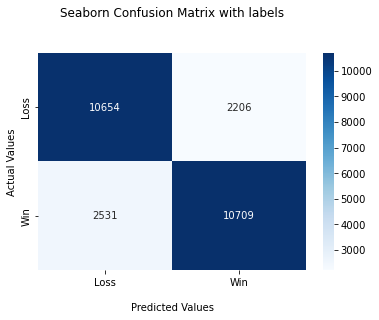

In [15]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)
cm_labels = LR_cv.classes_ # check to make sure orientation is right (compare with .classes_ above)
pl_df = pd.DataFrame(pl, index=cm_labels, columns=cm_labels) # converts 0/1 axes labels to Win/Loss

ax = sns.heatmap(pl_df, annot=True, cmap='Blues', fmt='g') # converts numbers out of scientific notation in the plot

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

plt.show()

In [16]:
# Print the classification report to view the F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.81      0.83      0.82     12860
         Win       0.83      0.81      0.82     13240

    accuracy                           0.82     26100
   macro avg       0.82      0.82      0.82     26100
weighted avg       0.82      0.82      0.82     26100



#### Random Forest

The second model we will fit with our training data is a random forest model (gini impurity). Once again, our evaluation metric will be the F1-score of our models.

In [17]:
# Fit a random forest model with our training data.
RF = RandomForestClassifier()
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [10, 20, 50], 'max_features': ['auto', 'log2']}
RF_cv = RandomizedSearchCV(RF, param_grid, cv=5, scoring=f1_scorer, random_state=42) # add random state argument
RF_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 20, 50],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42,
                   scoring=make_scorer(f1_score, pos_label=Win))

In [18]:
# Print results.
print('Hyperparameter settings that resulted in max F1-score for training set: {}'.format(RF_cv.best_params_))
print('Max F1-score for training set: {}'.format(RF_cv.best_score_))

Hyperparameter settings that resulted in max F1-score for training set: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 20}
Max F1-score for training set: 0.8117495575805019


In [19]:
# Predict label values on our test data.
y_pred = RF_cv.best_estimator_.predict(X_test)

In [20]:
# Check label orientation.
RF_cv.classes_

array(['Loss', 'Win'], dtype=object)

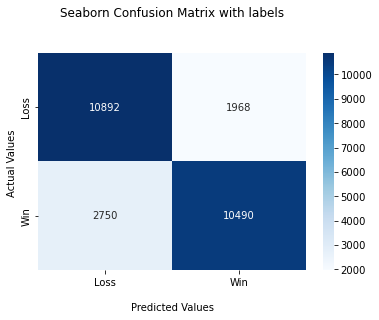

In [21]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)
cm_labels = RF_cv.classes_
pl_df = pd.DataFrame(pl, index=cm_labels, columns=cm_labels)

ax = sns.heatmap(pl_df, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [22]:
# Print the classification report to view the F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.80      0.85      0.82     12860
         Win       0.84      0.79      0.82     13240

    accuracy                           0.82     26100
   macro avg       0.82      0.82      0.82     26100
weighted avg       0.82      0.82      0.82     26100



#### Gradient Boosting

The last model we will try is gradient boosting. Our evaluation metric remains the same.

In [23]:
# Fit a gradient boosting model with our training data.
GB = GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [10, 20, 50], 'max_features': ['auto', 'log2'], 'learning_rate':[0.01, 0.1]}
GB_cv = RandomizedSearchCV(GB, param_grid, cv=5, scoring=f1_scorer)
GB_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [10, 20, 50],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [100, 300, 500]},
                   scoring=make_scorer(f1_score, pos_label=Win))

In [24]:
# Print results.
print('Hyperparameter settings that resulted in max F1-score for training set: {}'.format(GB_cv.best_params_))
print('Max F1-score for training set: {}'.format(GB_cv.best_score_))

Hyperparameter settings that resulted in max F1-score for training set: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 10, 'learning_rate': 0.01}
Max F1-score for training set: 0.8131975369327433


In [25]:
# Predict label values on our test data.
y_pred = GB_cv.best_estimator_.predict(X_test)

In [26]:
# Check label orientation.
GB_cv.classes_

array(['Loss', 'Win'], dtype=object)

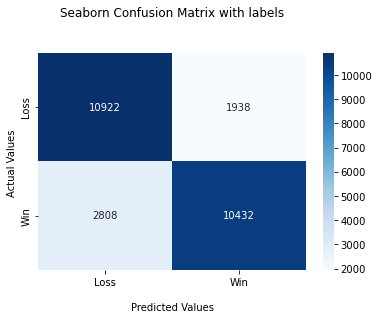

In [27]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)
cm_labels = GB_cv.classes_
pl_df = pd.DataFrame(pl, index=cm_labels, columns=cm_labels) # converts 0/1 axes labels to Win/Loss

ax = sns.heatmap(pl_df, annot=True, cmap='Blues', fmt='g') # converts numbers out of scientific notation in the plot

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [28]:
# Print the classification report to view the F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.80      0.85      0.82     12860
         Win       0.84      0.79      0.81     13240

    accuracy                           0.82     26100
   macro avg       0.82      0.82      0.82     26100
weighted avg       0.82      0.82      0.82     26100



### Our Best Model

The logistic regression model performed slightly better (although extremely close in f1-score) than our other models for the individual players data.

In [29]:
# Calculate the ROC score for our best model.
roc_auc_score(y_test, LR_cv.best_estimator_.predict_proba(X_test)[:,1])

0.8979421071920237

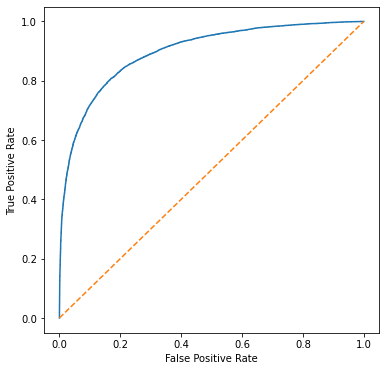

In [30]:
# Plot the ROC curve.
fpr, tpr, _ = roc_curve(y_test, LR_cv.best_estimator_.predict_proba(X_test)[:,1], pos_label = 'Win')

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = 'dashed')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

Let's now also take a look at the feature coefficents in our best model to assess feature importance.

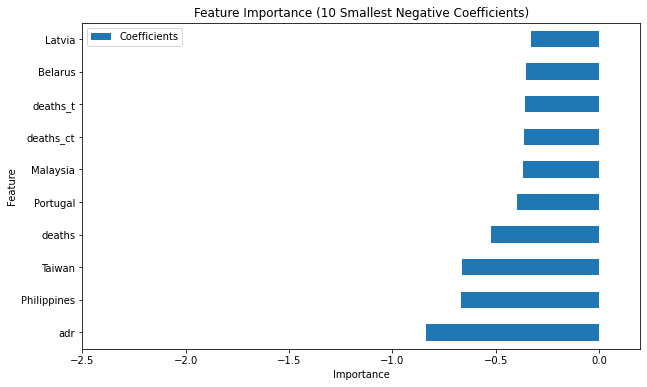

In [31]:
# Extract feature coefficients from the best model.
model_coefs = LR_cv.best_estimator_.coef_.T.tolist() # Transpose array to match feature array shape.

# Convert model_coefs list of lists to a flat list.
coefs_list = []
for sublist in model_coefs:
    for item in sublist:
        coefs_list.append(item)
feature_imp = pd.DataFrame(coefs_list, columns = ['Coefficients'], index = X_train.columns)
feature_imp = feature_imp.sort_values('Coefficients') # Sort values for plotting min/max coefficients.

# Plot the features with their coefficients for the 10 smallest negative coefficients.
feature_imp.plot(kind = 'barh', figsize=(10, 6))
plt.ylim(-.5, 9.5)
plt.xlim(-2.5, 0.2)
plt.title('Feature Importance (10 Smallest Negative Coefficients)')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

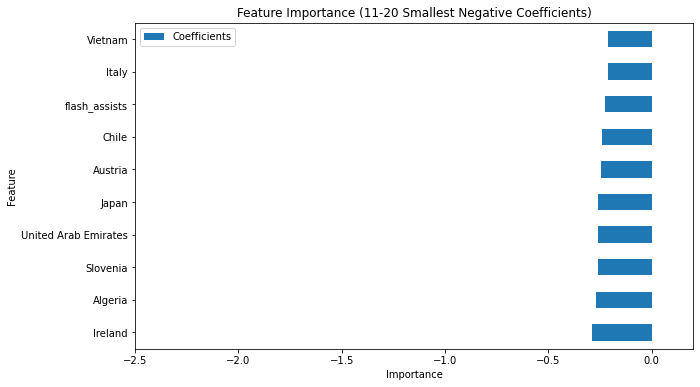

In [32]:
# Plot the features with their coefficients for the next 10 smallest negative coefficients.
feature_imp.plot(kind = 'barh', figsize=(10, 6))
plt.ylim(9.5, 19.5)
plt.xlim(-2.5, 0.2)
plt.title('Feature Importance (11-20 Smallest Negative Coefficients)')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

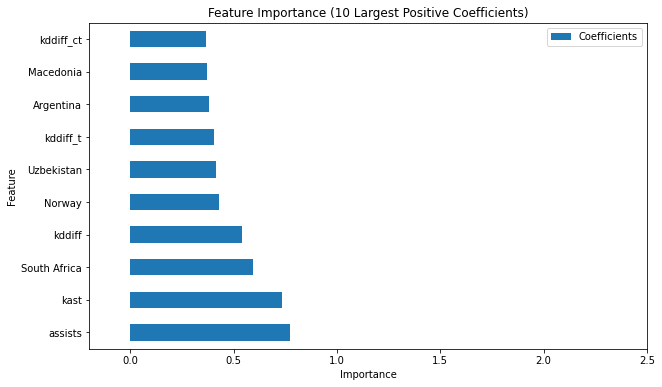

In [33]:
feature_imp = feature_imp.sort_values('Coefficients', ascending = False) # Sort values for plotting min/max coefficients.

# Plot the features with their coefficients for the 10 largest positive coefficients.
feature_imp.plot(kind = 'barh', figsize=(10, 6))
plt.ylim(-.5, 9.5)
plt.xlim(-0.2, 2.5)
plt.title('Feature Importance (10 Largest Positive Coefficients)')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

## Team Players Modeling

### Reading in the Team Players Files

In [34]:
X_train = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Team Data/X_train_team.csv')
X_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [35]:
X_train.head()

,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t
0,-0.151270,0.324869,-2.094226,-0.193273,-0.351136,1.651112,1.748676,2.135729,0.003075,-1.837573,-2.326457,0.268893,1.542559,2.276912,1.816033,-0.612419,2.207708,1.777187,1.164817
1,0.120339,-0.355654,-0.652432,0.091721,-0.018476,0.825801,0.694739,0.765437,0.493183,-0.957541,-1.098648,0.039077,0.168072,0.478128,1.231880,0.147320,0.944805,0.864574,0.762055
2,-0.106002,-0.627863,0.293745,-0.003277,-0.018476,0.341159,-0.359197,-0.478589,0.493183,-0.018840,-0.452432,0.383802,0.350778,1.344742,-0.131143,0.790176,-0.892145,-0.877136,-0.557182
3,-0.558685,0.052660,-2.094226,-0.193273,-0.018476,1.448332,1.383852,1.850079,1.473397,-2.130917,-2.455700,0.096531,1.820809,-0.121467,1.556410,-0.495536,1.863280,1.511451,1.369998
4,1.704730,0.460974,1.690483,0.376716,-1.681774,0.073490,0.005627,0.289354,-0.650401,0.919861,1.033863,-0.018377,-0.204045,-0.121467,1.426598,1.257708,0.026330,0.568468,0.202747


In [36]:
y_train = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Team Data/y_train_team.csv')
y_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [37]:
y_train.head()

,match_outcome
0,Win
1,Win
2,Loss
3,Win
4,Loss


In [38]:
X_test = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Team Data/X_test_team.csv')
X_test.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [39]:
X_test.head()

,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t
0,0.754096,0.460974,-0.066703,1.231699,-0.351136,0.365492,0.735275,0.382500,0.003075,1.389211,-0.646297,1.935063,1.302862,0.997777,-0.455673,0.497969,-0.892145,-0.846766,-0.558702
1,1.478389,-0.219549,1.284979,1.231699,-1.681774,-0.242845,0.167771,0.067872,0.166444,0.567848,1.227727,-0.535464,-0.393456,-0.639516,1.491504,0.556410,0.772591,0.402952,0.202747
2,0.708827,-0.491759,-0.652432,-0.003277,-0.018476,1.332748,1.221707,1.429884,0.819921,1.095867,0.064540,1.015797,1.038022,1.103305,-0.196049,-0.904626,0.715186,1.031608,0.810690
3,-1.056636,-0.763968,0.473970,-0.478267,0.979502,-1.380436,-1.372598,-0.687652,-2.774200,-1.837573,-0.258568,-1.569638,-1.799791,-2.519845,0.517916,0.848617,-0.375503,0.182771,-0.253210
4,-0.151270,-0.763968,0.699250,-0.193273,-0.018476,-0.936350,-0.764558,-0.762169,-0.487032,-0.194846,0.839998,-0.937643,-0.911403,-1.346239,-0.001331,0.147320,-0.145884,-0.335034,-0.122503


In [40]:
y_test = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Team Data/y_test_team.csv')
y_test.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [41]:
y_test.head()

,match_outcome
0,Win
1,Loss
2,Win
3,Loss
4,Loss


### Training Models

We will use the same models as above since the data is the same (with less features), just aggregated by team performance. We will substitute gradient boosting for svm since the lower dimensionality will allow the algorithm to run faster.

#### Logistic Regression

In [42]:
# Fit a logistic regression model with our training data.
LR = LogisticRegression()
param_grid = {'C':[0.1, 1.0, 10.0], 'penalty':['l1', 'l2'], 'solver':['liblinear']}
LR_cv = RandomizedSearchCV(LR, param_grid, cv=5, scoring=f1_scorer, random_state=42)
LR_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42,
                   scoring=make_scorer(f1_score, pos_label=Win))

In [43]:
# Print results.
print('Hyperparameter settings that resulted in max F1-score for training set: {}'.format(LR_cv.best_params_))
print('Max F1-score for training set: {}'.format(LR_cv.best_score_))

Hyperparameter settings that resulted in max F1-score for training set: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10.0}
Max F1-score for training set: 0.9450816121305305


In [44]:
# Predict label values on our test data.
y_pred = LR_cv.best_estimator_.predict(X_test)

In [45]:
# Check label orientation.
LR_cv.classes_

array(['Loss', 'Win'], dtype=object)

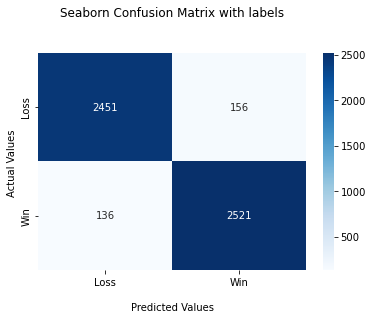

In [46]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)
cm_labels = LR_cv.classes_
pl_df = pd.DataFrame(pl, index=cm_labels, columns=cm_labels) # converts 0/1 axes labels to Win/Loss

ax = sns.heatmap(pl_df, annot=True, cmap='Blues', fmt='g') # converts numbers out of scientific notation in the plot

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [47]:
# Print the classification report to view the F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.95      0.94      0.94      2607
         Win       0.94      0.95      0.95      2657

    accuracy                           0.94      5264
   macro avg       0.94      0.94      0.94      5264
weighted avg       0.94      0.94      0.94      5264



#### Random Forest

In [48]:
# Fit a random forest model with our training data.
RF = RandomForestClassifier()
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [10, 20, 50], 'max_features': ['auto', 'log2']}
RF_cv = RandomizedSearchCV(RF, param_grid, cv=5, scoring=f1_scorer, random_state=42)
RF_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 20, 50],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42,
                   scoring=make_scorer(f1_score, pos_label=Win))

In [49]:
# Print results.
print('Hyperparameter settings that resulted in max F1-score for training set: {}'.format(RF_cv.best_params_))
print('Max F1-score for training set: {}'.format(RF_cv.best_score_))

Hyperparameter settings that resulted in max F1-score for training set: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 10}
Max F1-score for training set: 0.9432545385110831


In [50]:
# Predict label values on our test data.
y_pred = RF_cv.best_estimator_.predict(X_test)

In [51]:
# Check label orientation.
RF_cv.classes_

array(['Loss', 'Win'], dtype=object)

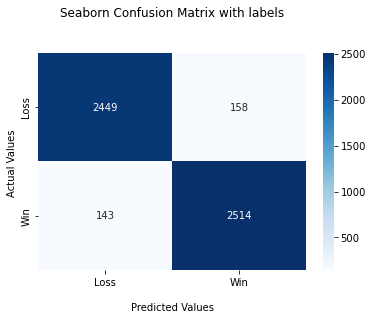

In [52]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)
cm_labels = RF_cv.classes_
pl_df = pd.DataFrame(pl, index=cm_labels, columns=cm_labels) # converts 0/1 axes labels to Win/Loss

ax = sns.heatmap(pl_df, annot=True, cmap='Blues', fmt='g') # converts numbers out of scientific notation in the plot

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [53]:
# Print the classification report to view the F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.94      0.94      0.94      2607
         Win       0.94      0.95      0.94      2657

    accuracy                           0.94      5264
   macro avg       0.94      0.94      0.94      5264
weighted avg       0.94      0.94      0.94      5264



#### SVM

In [54]:
# Fit an svm model with our training data.
SVM = svm.SVC()
param_grid = {'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1, 10]}
SVM_cv = RandomizedSearchCV(SVM, param_grid, cv=5, scoring=f1_scorer, random_state=42)
SVM_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*ar

C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'gamma': [0.1, 1, 10]},
                   random_state=42,
                   scoring=make_scorer(f1_score, pos_label=Win))

In [55]:
# Print results.
print('Hyperparameter settings that resulted in max F1-score for training set: {}'.format(SVM_cv.best_params_))
print('Max F1-score for training set: {}'.format(SVM_cv.best_score_))

Hyperparameter settings that resulted in max F1-score for training set: {'gamma': 0.1, 'C': 1.0}
Max F1-score for training set: 0.944737449181771


In [56]:
# Predict label values on our test data.
y_pred = SVM_cv.best_estimator_.predict(X_test)

In [57]:
# Check label orientation.
SVM_cv.classes_

array(['Loss', 'Win'], dtype=object)

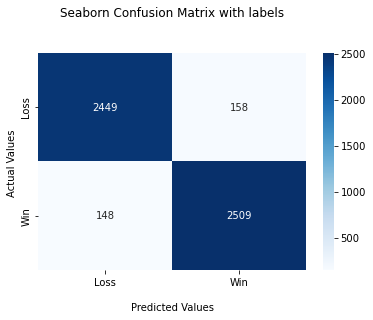

In [58]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)
cm_labels = SVM_cv.classes_
pl_df = pd.DataFrame(pl, index=cm_labels, columns=cm_labels) # converts 0/1 axes labels to Win/Loss

ax = sns.heatmap(pl_df, annot=True, cmap='Blues', fmt='g') # converts numbers out of scientific notation in the plot

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [59]:
# Print the classification report to view the F1-score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.94      0.94      0.94      2607
         Win       0.94      0.94      0.94      2657

    accuracy                           0.94      5264
   macro avg       0.94      0.94      0.94      5264
weighted avg       0.94      0.94      0.94      5264



### Our Best Model

The logistic regression model performed slightly better (although extremely close in f1-score) than our other models for the team players data.

In [60]:
# Calculate the ROC score for our best model.
roc_auc_score(y_test, LR_cv.best_estimator_.predict_proba(X_test)[:,1])

0.9879124542230834

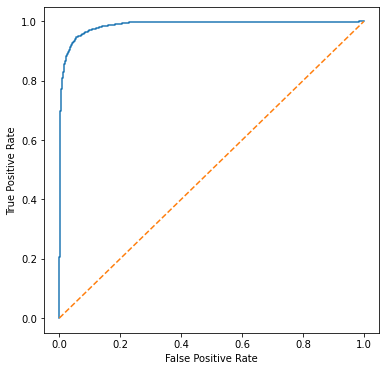

In [61]:
# Plot the ROC curve.
fpr, tpr, _ = roc_curve(y_test, LR_cv.best_estimator_.predict_proba(X_test)[:,1], pos_label = 'Win')

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = 'dashed')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

Let's again take a look at the feature coefficents in our best model like before to assess feature importance.

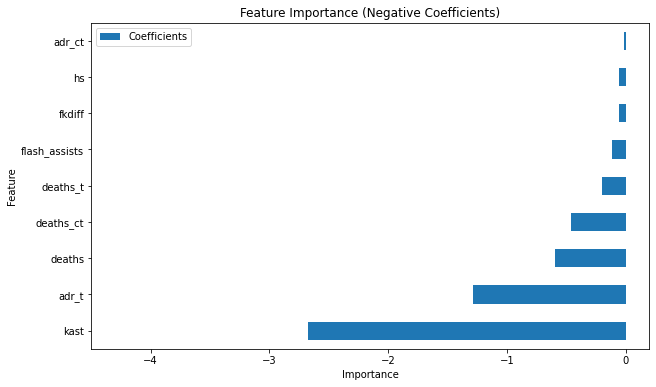

In [62]:
# Extract feature coefficients from the best model.
model_coefs = LR_cv.best_estimator_.coef_.T.tolist() # Transpose array to match feature array shape.

# Convert model_coefs list of lists to a flat list.
coefs_list = []
for sublist in model_coefs:
    for item in sublist:
        coefs_list.append(item)
feature_imp = pd.DataFrame(coefs_list, columns = ['Coefficients'], index = X_train.columns)
feature_imp = feature_imp.sort_values('Coefficients') # Sort values for plotting min/max coefficients.

# Plot the features with their coefficients for the negative coefficients.
feature_imp.plot(kind = 'barh', figsize=(10, 6))
plt.ylim(-.5, 8.5)
plt.xlim(-4.5, 0.2)
plt.title('Feature Importance (Negative Coefficients)')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

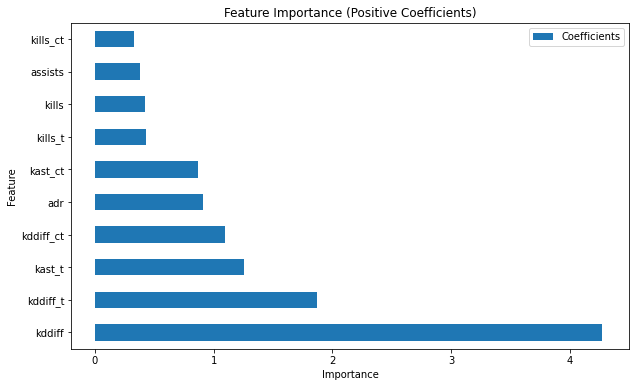

In [63]:
feature_imp = feature_imp.sort_values('Coefficients', ascending = False) # Sort values for plotting min/max coefficients.

# Plot the features with their coefficients for the positive coefficients.
feature_imp.plot(kind = 'barh', figsize=(10, 6))
plt.ylim(-.5, 9.5)
plt.xlim(-0.2, 4.5)
plt.title('Feature Importance (Positive Coefficients)')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()